# Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn import set_config


# Loading the Data


In [11]:
df = pd.read_csv('Bike_train.csv',index_col=0,parse_dates=True)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [20]:
df.reset_index(inplace=True)

# Preprocessing the Data

In [21]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [22]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

# Exploratory Analysis

In [31]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] =df['datetime'].dt.day
df['hour'] =df['datetime'].dt.hour
df['day_name'] =df['datetime'].dt.day_name()
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,day_name,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,0,Saturday,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,2,Saturday,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,3,Saturday,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,4,Saturday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,Wednesday,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,20,Wednesday,19
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,21,Wednesday,19
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,22,Wednesday,19


In [117]:
df['day_name'].nunique()

7

<AxesSubplot:>

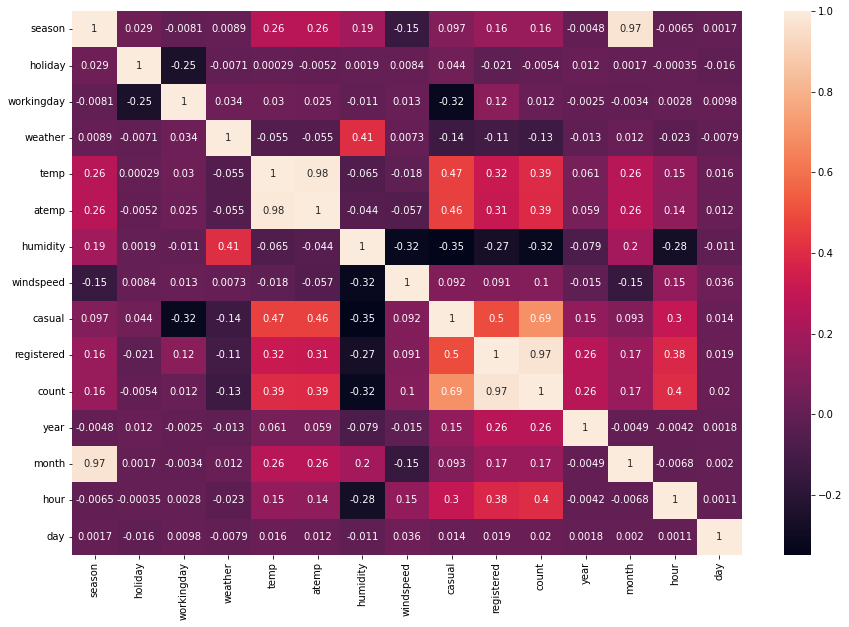

In [35]:
corr = df.corr()
plt.figure(figsize =(15,10))
sns.heatmap(corr,annot=True,annot_kws={'size':10})

<AxesSubplot:xlabel='season', ylabel='count'>

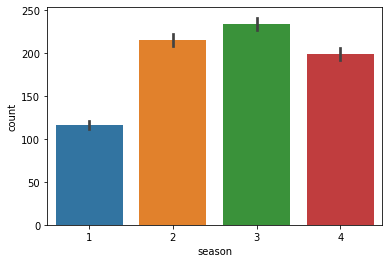

In [24]:
sns.barplot(x='season',y='count',data=df) #in fall the count is highest

<AxesSubplot:xlabel='weather', ylabel='count'>

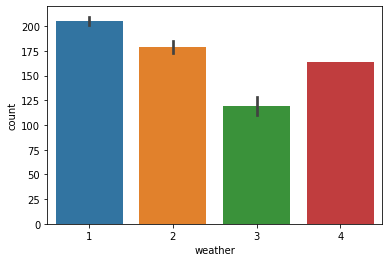

In [25]:
sns.barplot(x='weather',y='count',data = df)#clear,no clouds day the demand is max

<AxesSubplot:xlabel='month', ylabel='count'>

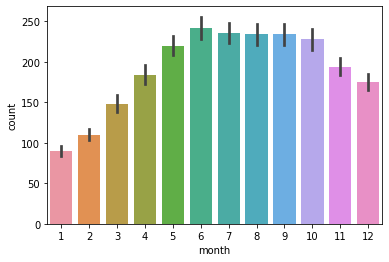

In [29]:
sns.barplot(x='month',y='count',data=df)

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

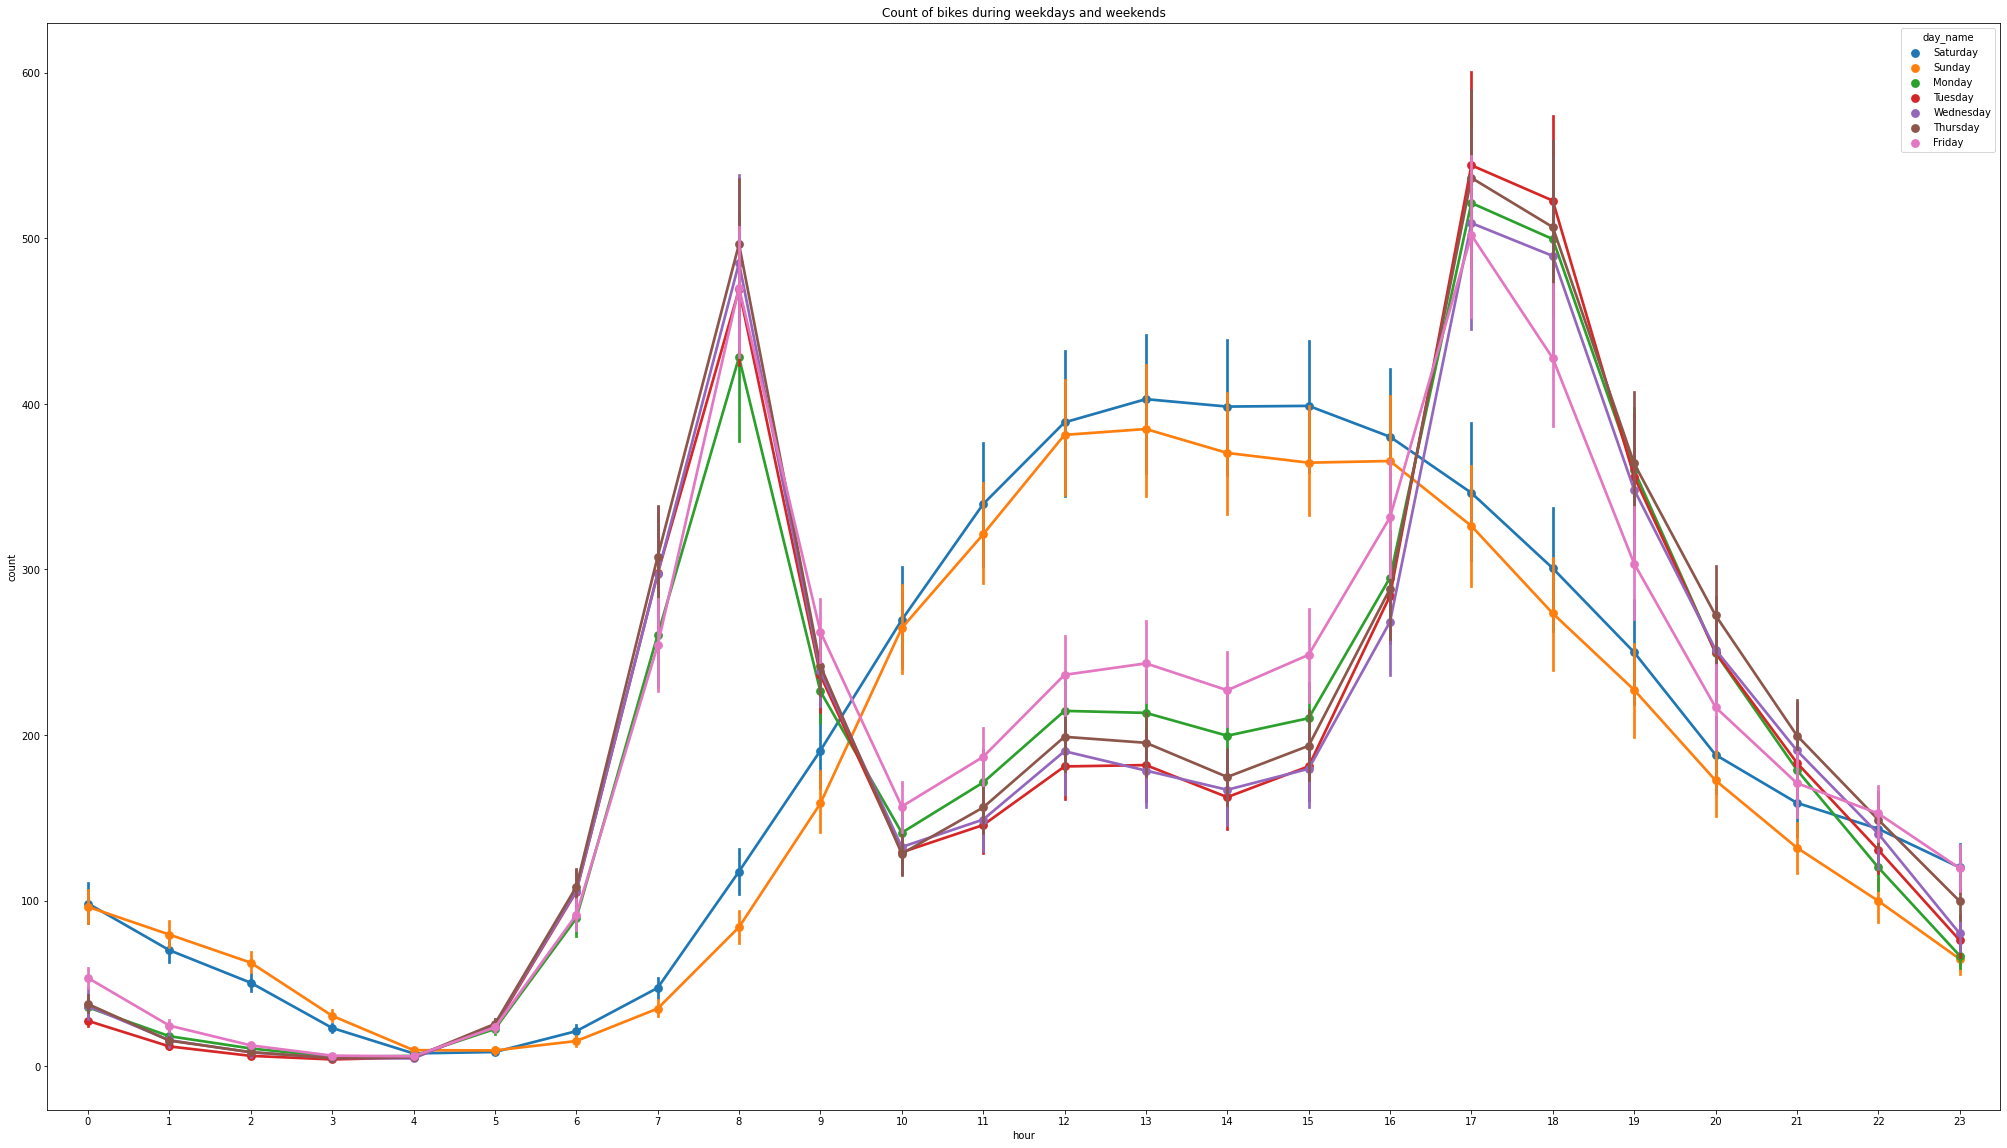

In [124]:
fig,ax=plt.subplots(figsize=(35,20))
sns.pointplot(data=df,x='hour',y='count',hue='day_name',ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

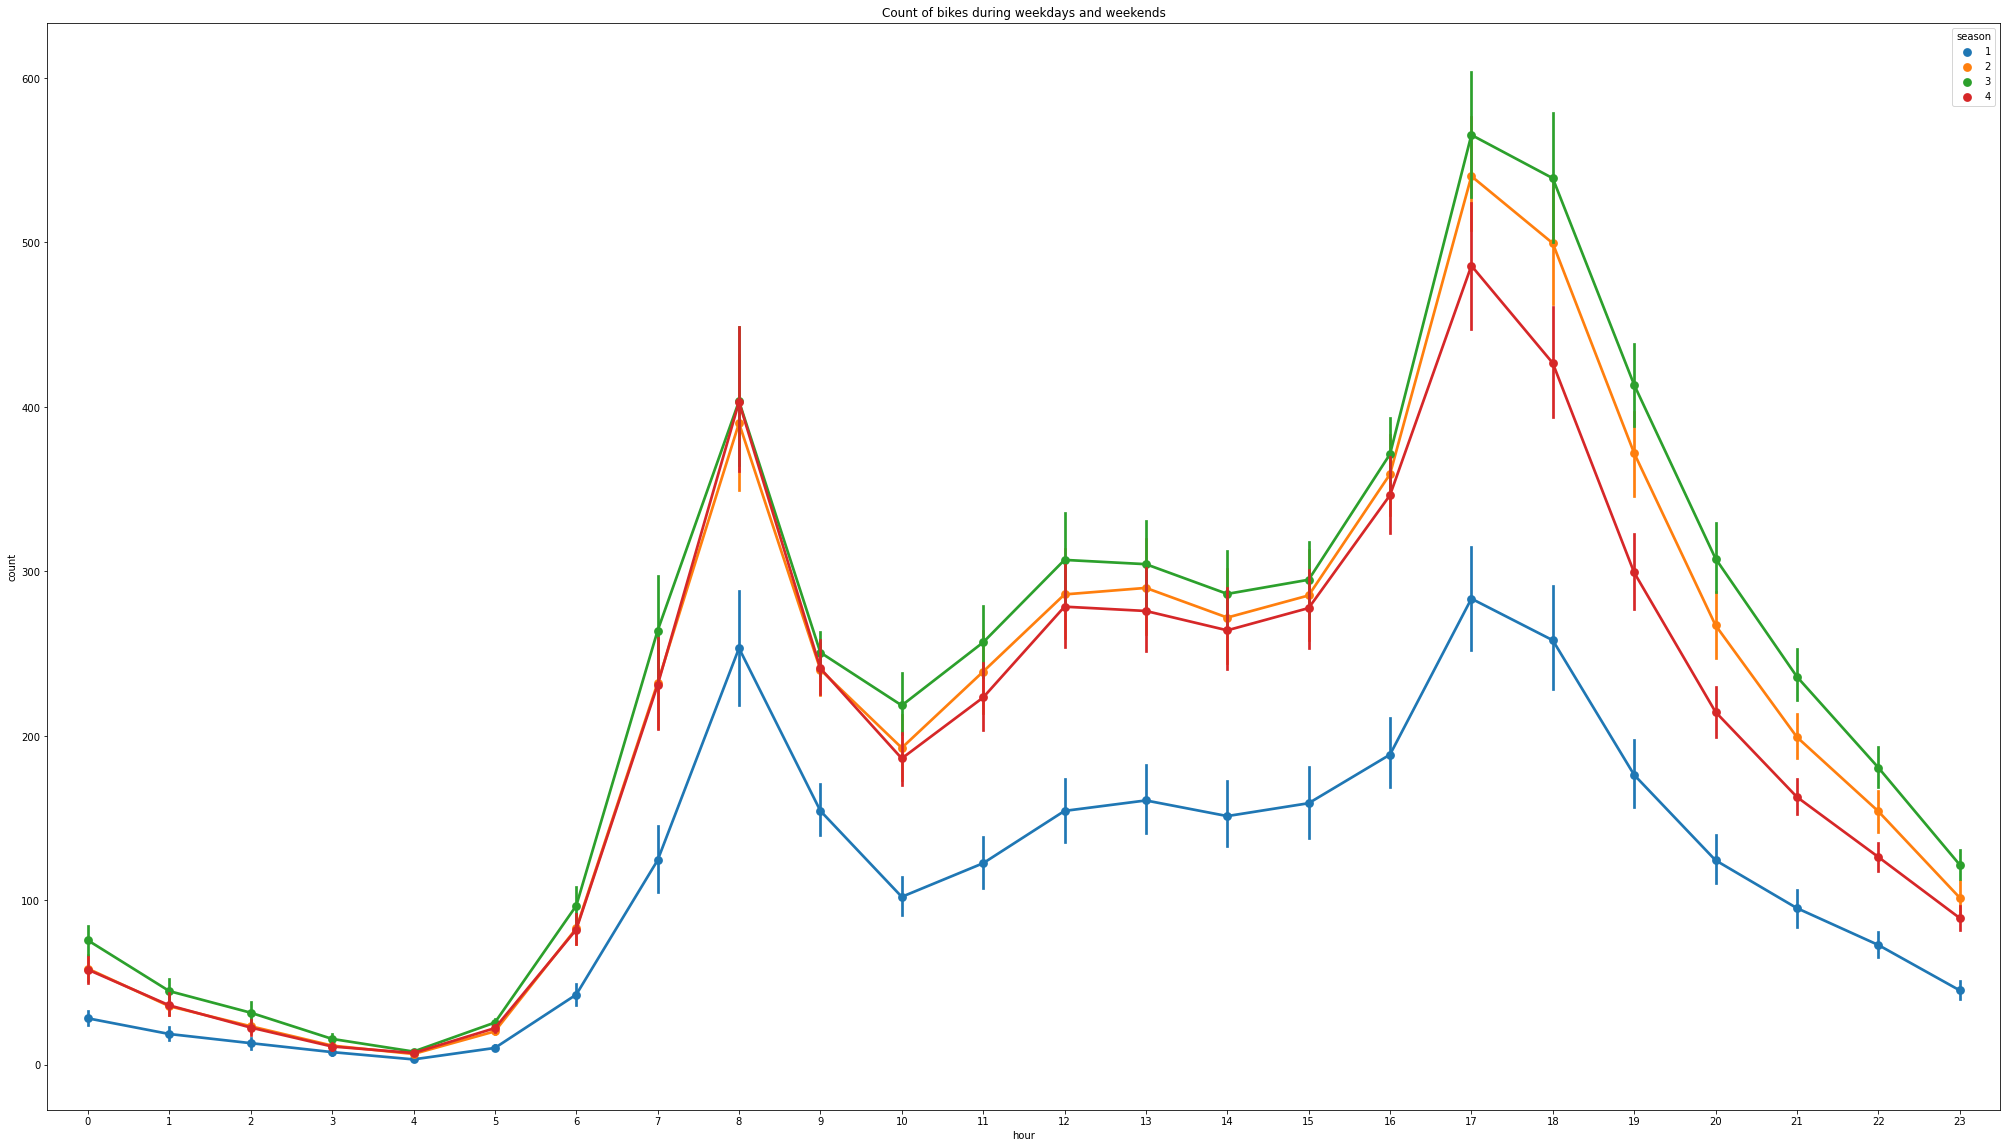

In [126]:
fig,ax=plt.subplots(figsize=(35,20))
sns.pointplot(data=df,x='hour',y='count',hue='season',ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

# Feature Engineering

In [39]:
X = df.drop(['count','datetime','casual','registered'],axis=1)
y= df['count']

In [40]:
X.shape,y.shape

((10886, 13), (10886,))

In [41]:
ohe_col = X[['year','day_name','month','hour']]
ohe_col

,year,day_name,month,hour
0,2011,Saturday,1,0
1,2011,Saturday,1,1
2,2011,Saturday,1,2
3,2011,Saturday,1,3
4,2011,Saturday,1,4
...,...,...,...,...
10881,2012,Wednesday,12,19
10882,2012,Wednesday,12,20
10883,2012,Wednesday,12,21
10884,2012,Wednesday,12,22


In [42]:
sca_col = X[['temp']]
sca_col

,temp
0,9.84
1,9.02
2,9.02
3,9.84
4,9.84
...,...
10881,15.58
10882,14.76
10883,13.94
10884,13.94


In [43]:
ohe = OneHotEncoder()
ohe_fit = ohe.fit(ohe_col)


In [44]:
ohe_array = ohe_fit.transform(ohe_col).toarray()
ohe_array.shape

(10886, 45)

In [45]:
ohe_columns = pd.DataFrame(data =ohe_array,columns=['y1','y2','m','t','w','th','f','sa','su',
                                                    'm1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12',
                                                    'h1','h2','h3','h4','h5','h6','h7','h8','h9','h10','h11','h12','h13','h14','h15',
                                                    'h16','h17','h18','h19','h20','h21','h22','h23','h24'])
ohe_columns.shape

(10886, 45)

In [46]:
X = pd.concat([X,ohe_columns],axis=1)
X.shape


(10886, 58)

In [47]:
sca= MinMaxScaler()

In [48]:
sca_fit =sca.fit(sca_col)

In [49]:
sca_array = sca_fit.transform(sca_col)
sca_array

array([[0.2244898 ],
       [0.20408163],
       [0.20408163],
       ...,
       [0.32653061],
       [0.32653061],
       [0.30612245]])

In [50]:
sca_columns = pd.DataFrame(data = sca_array,columns =['temp_s'])
sca_columns

,temp_s
0,0.224490
1,0.204082
2,0.204082
3,0.224490
4,0.224490
...,...
10881,0.367347
10882,0.346939
10883,0.326531
10884,0.326531


In [51]:
X = pd.concat([X,sca_columns],axis=1)
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,...,h16,h17,h18,h19,h20,h21,h22,h23,h24,temp_s
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.224490
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.204082
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.204082
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.224490
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.224490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.367347
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.346939
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.326531
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.326531


In [52]:
X.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'hour', 'day_name', 'day',
       'y1', 'y2', 'm', 't', 'w', 'th', 'f', 'sa', 'su', 'm1', 'm2', 'm3',
       'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'h1', 'h2',
       'h3', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9', 'h10', 'h11', 'h12', 'h13',
       'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23',
       'h24', 'temp_s'],
      dtype='object')

# Train_Test_split

In [53]:
X_fe = X[['season','weather','holiday','workingday','humidity','temp_s','y1','y2','m','t','w','th','f','sa','su',
          'm1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12',
          'h1','h2','h3','h4','h5','h6','h7','h8','h9','h10','h11','h12','h13','h14','h15',
          'h16','h17','h18','h19','h20','h21','h22','h23','h24']]
X_fe

,season,weather,holiday,workingday,humidity,temp_s,y1,y2,m,t,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
0,1,1,0,0,81,0.224490,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0,0,80,0.204082,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,0,0,80,0.204082,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0,0,75,0.224490,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0,0,75,0.224490,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,1,0,1,50,0.367347,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10882,4,1,0,1,57,0.346939,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10883,4,1,0,1,61,0.326531,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10884,4,1,0,1,61,0.326531,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_fe,y,test_size =0.25,random_state=100)
X_train


,season,weather,holiday,workingday,humidity,temp_s,y1,y2,m,t,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
1118,1,1,0,1,81,0.244898,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1649,2,1,0,1,31,0.591837,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1608,2,2,0,1,94,0.387755,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1850,2,3,0,1,77,0.510204,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4801,4,2,0,0,62,0.346939,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,1,1,0,0,56,0.244898,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,1,1,0,1,51,0.204082,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8039,2,1,0,1,69,0.591837,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6936,2,1,0,0,34,0.326531,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#LinearRegression

In [3]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestClassifier

lr= LinearRegression()

In [4]:
lr.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [ ]:
round(lr.score(X_train,y_train),3)

In [ ]:
round(lr.score(X_test,y_test),3)

In [ ]:
y_pred=lr.predict(X_test)
y_pred

In [ ]:
plt.plot(X_train[['temp_s']], y_train, 'bs', label="train")
plt.plot(X_test[['temp_s']], y_test, 'ro', label="test")
plt.plot(X_test[['temp_s']], y_pred, 'co', label="fit")
plt.legend()

# Feature Expansion

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
Degree =2
poly = PolynomialFeatures(degree=2)

In [ ]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
X_train_poly

In [ ]:
pd.DataFrame(X_train_poly,columns=poly.get_feature_names())

In [ ]:
lr_poly = LinearRegression()

In [ ]:
lr_poly.fit(X_train_poly,y_train)

In [ ]:
round(lr_poly.score(X_train_poly,y_train),3)

In [79]:
round(lr_poly.score(X_test_poly,y_test),3)

0.917

In [148]:
ypred_poly = lr_poly.predict(X_train_poly)
ypred_test = lr_poly.predict(X_test_poly)
ypred_poly

array([ 28.3067584 , 123.03899336,  44.93189573, ..., 671.71129179,
       239.80143785,  18.62721586])

In [1]:
lr_lasso = Lasso(alpha=0.1, random_state=31)

NameError: name 'Lasso' is not defined

In [83]:
lr_lasso.fit(X_train_poly, y_train)

Lasso(alpha=1, random_state=31)

In [84]:
lr_lasso.score(X_train_poly,y_train)

0.7942361777523899

In [85]:
lr_lasso.score(X_test_poly,y_test)

0.7802965258442516

In [152]:
ypred_lasso =lr_lasso.predict(X_train_poly)
ypred_lasso

array([  49.3306211 ,  168.68909808,   47.07401207, ...,  560.02250975,
        263.08808593, -105.00186624])

In [87]:
lr_ridge =Ridge(alpha=1,random_state=31)

In [88]:
lr_ridge.fit(X_train_poly,y_train)

Ridge(alpha=1, random_state=31)

In [89]:
lr_ridge.score(X_train_poly,y_train)

0.9346556645010428

In [90]:
lr_ridge.score(X_test_poly,y_test)

0.9172414452487753

In [151]:
ypred_ridge=lr_ridge.predict(X_train_poly)
ypred_ridge

array([ 29.77003291, 119.76432653,  43.54523258, ..., 670.35978825,
       243.74699934,  11.71132429])

# r^2 & RMSE

In [95]:
from sklearn.metrics import mean_squared_error

In [96]:
lr_poly_r2 = lr_poly.score(X_train_poly,y_train)
lr_poly_rmse = np.sqrt(mean_squared_error(y_train,ypred_poly))
lr_lasso_r2 = lr_lasso.score(X_train_poly,y_train)
lr_lasso_rmse = np.sqrt(mean_squared_error(y_train,ypred_lasso))
lr_ridge_r2 = lr_ridge.score(X_train_poly,y_train)
lr_ridge_rmse = np.sqrt(mean_squared_error(y_train,ypred_ridge))

In [114]:
lr_poly_r2,lr_poly_rmse,lr_lasso_r2,lr_lasso_rmse,lr_ridge_r2,lr_ridge_rmse


(0.9352359290239699,
 46.231164469096136,
 0.7942361777523899,
 82.40475488569385,
 0.9346556645010428,
 46.437810555348754)

In [2]:
from tabulate import tabulate

table = [["Poly",0.9352359290239699,
                 46.231164469096136],
         ["Lasso",0.7942361777523899,
                  82.40475488569385],
        ["Ridge",0.9346556645010428,
                 46.437810555348754]]
print(tabulate(table,headers=('Reg','r2','RMSE')))

Reg          r2     RMSE
-----  --------  -------
Poly   0.935236  46.2312
Lasso  0.794236  82.4048
Ridge  0.934656  46.4378


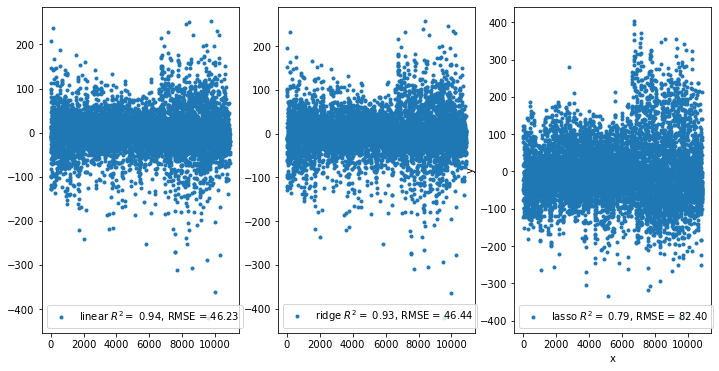

In [93]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)

plt.plot(y_train-ypred_poly,'.',label = f'linear $R^2 = $ {lr_poly_r2:.2f}, RMSE = {lr_poly_rmse:.2f}')
plt.legend()
plt.subplot(1,3,2)
plt.plot(y_train-ypred_ridge,'.',label = f'ridge $R^2 = $ {lr_ridge_r2:.2f}, RMSE = {lr_ridge_rmse:.2f}')
plt.legend()
plt.subplot(1,3,3)
plt.plot(y_train-ypred_lasso.reshape(-1,1),'.',label = f'lasso $R^2 = $ {lr_lasso_r2:.2f}, RMSE = {lr_lasso_rmse:.2f}')

plt.xlabel('x')
plt.ylabel('y')
plt.legend();